In [1]:
import pandas as pd


In [2]:

inventory_df = pd.read_csv("D:\python\Copy of Inventory Dataset(1438).csv")
new_inventory_df = pd.read_csv("D:\python\Copy of New Inventory(1439).csv")


In [3]:
merged_df = pd.merge(inventory_df, new_inventory_df, on='ItemNumber', how='left')


In [4]:
merged_df['future_inventory'] = merged_df['Inventory'] + merged_df['TotalItemQty']




In [32]:
pivot_table = pd.pivot_table(merged_df, values='future_inventory', index=['ItemNumber'], columns=['InventoryReceive'],fill_value=0)


In [33]:
pivot_table.head(10)



InventoryReceive,2023-04-08,2023-07-07,2023-07-14,2023-07-21,2023-07-28,2023-08-09,2023-08-16,2023-08-18,2023-08-22,2023-08-25,2023-09-07,2023-09-29,2023-10-07,2023-10-13
ItemNumber,,,,,,,,,,,,,,
064-01-1346,4354,4026,0,0,0,0,3954,0,0,0,5418,0,4954,0
064-01-1347,5361,4561,0,0,0,0,0,0,0,0,7129,0,5561,0
064-01-1348,4228,3816,0,0,0,0,0,0,0,0,4948,0,4672,0
064-01-1349,4660,3036,0,0,0,0,0,0,0,0,4956,0,3940,0
064-01-1351,0,3336,0,0,0,0,0,0,0,0,3796,0,3136,0
064-01-1360,3835,3935,0,0,0,0,0,0,0,0,6175,0,5135,0
064-01-1361,6235,4659,0,0,0,0,0,0,0,0,8655,0,6035,0
064-01-1362,5281,0,0,0,0,0,0,0,0,0,6361,0,6425,0
064-01-1363,6316,4488,0,0,0,0,0,0,0,0,7128,0,6824,0


In [34]:
print(inventory_df.isnull().sum())
print(new_inventory_df.isnull().sum())


ItemNumber    0
Date          0
Inventory     0
dtype: int64
ItemNumber          0
InventoryReceive    0
TotalItemQty        0
dtype: int64


In [35]:
merged_df['future_inventory'] = merged_df['future_inventory'].round().fillna(0).astype(int)

merged_df['InventoryReceive'] = pd.to_datetime(merged_df['InventoryReceive'])


In [36]:
merged_df['week'] = merged_df['InventoryReceive'].dt.to_period('W')


In [37]:
monthly_inventory = merged_df.groupby('week')['future_inventory'].sum().astype(int)
print(monthly_inventory)



week
2023-04-03/2023-04-09    1269152
2023-07-03/2023-07-09     536925
2023-07-10/2023-07-16      28833
2023-07-17/2023-07-23      96991
2023-07-24/2023-07-30     437009
2023-08-07/2023-08-13     985897
2023-08-14/2023-08-20    1785408
2023-08-21/2023-08-27      53521
2023-09-04/2023-09-10    1354711
2023-09-25/2023-10-01    1201127
2023-10-02/2023-10-08    1135288
2023-10-09/2023-10-15    1191242
Freq: W-SUN, Name: future_inventory, dtype: int32


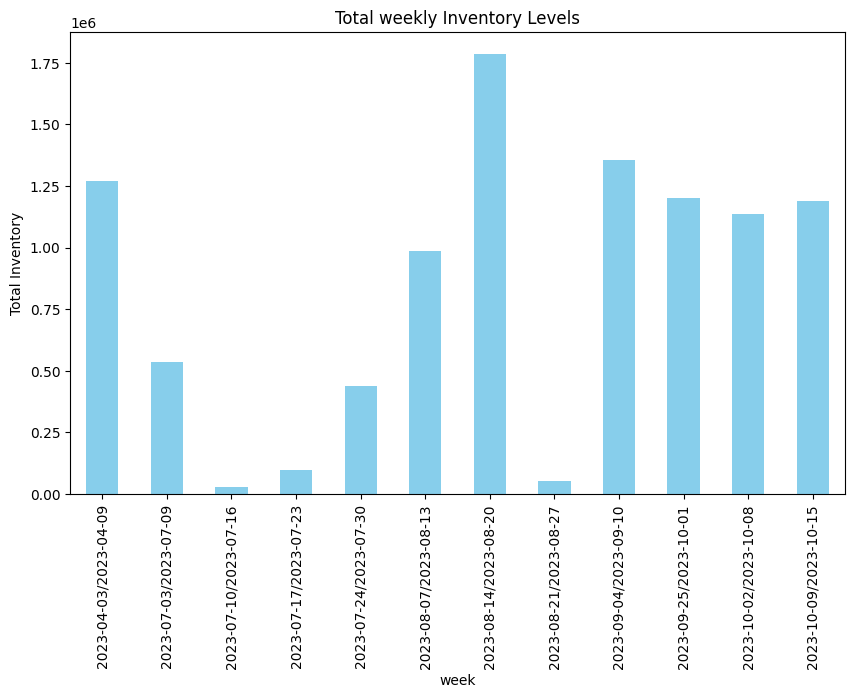

In [38]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
monthly_inventory.plot(kind='bar', color='skyblue')
plt.title('Total weekly Inventory Levels')
plt.xlabel('week')
plt.ylabel('Total Inventory')
plt.show()




In [39]:
pivot_table.to_csv('future_inventory_table2.csv')